In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import wio
import wind

In [2]:
caseDir = r'D:\tempData_depot\simData_CandC\wt_tngE2/'
# velTH = r'E:\TNG\Profiles\RawData\tngE2Fr1/'
dataDirHFPI = r'E:\TNG\rawHFPI\tngE2p1/'

In [3]:
file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_profile.csv'
temp = pd.read_csv(file)

dt = 3.7890e-04
H = 0.08

# file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_TH-UofT.csv'
# U_TH = np.transpose((pd.read_csv(file)).to_numpy())
# file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_TH-VofT.csv'
# V_TH = np.transpose((pd.read_csv(file)).to_numpy())
# file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_TH-WofT.csv'
# W_TH = np.transpose((pd.read_csv(file)).to_numpy())

file = caseDir+'tngE2Fr1_TH-UofT.npy'
U_TH = np.load(file)
file = caseDir+'tngE2Fr1_TH-VofT.npy'
V_TH = np.load(file)
file = caseDir+'tngE2Fr1_TH-WofT.npy'
W_TH = np.load(file)

vel = wind.profile(name="BLWT-E2", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt,nSpectAvg=64)


In [4]:


file_pssd = dataDirHFPI+'TNGp1E02R001P001a.pssd'
file_pssr = dataDirHFPI+'TNGp1E02R001P001a.pssr'

cp_data,analog,WTTDATALOG = wio.readPSSfile(file_pssr,file_pssd)

mainRefPitotChnlIdx = 2
fps2mps = 0.3048
UpitotOfT = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
Upitot = np.mean(UpitotOfT)
Zpitot = 1.48
AoA = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0]
sampleRate = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]


tapFile = caseDir+'tngTapDefinition.csv'
tapGeom = pd.read_csv(tapFile)

In [5]:

# x = UpitotOfT
# # x = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
# print(np.shape(x))
# print(np.mean(x))

# print(tapGeom.to_numpy()[:,2:4])

In [6]:
ttu = wind.building('TTU',H=0.08,B=0.2744,D=0.183,He=0.078094,
                    tapNo=tapGeom.tapNo,tapFaceID=tapGeom.faceID,
                    tapCoord2D=tapGeom.to_numpy()[:,2:4],
                    lScl=1/50)

cp = wind.Cp(name='tngE1_0000',bldg=ttu,refProfile=vel,AoA=AoA,
                samplingFreq=sampleRate,CpOfT=cp_data.transpose(),Zref_input=Zpitot,
                Uref_input=Upitot)

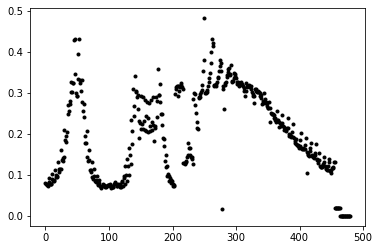

In [7]:
plt.plot(cp.CpStd,'.k')
# print(cp_data.shape)

In [11]:
# from scipy.spatial import Voronoi, voronoi_plot_2d

# points = np.array([[0.1, 0], [0, 1.5], [0, 2], [1, 0], [1.2, 1], [1, 2],
#                    [2, 0], [2, 1], [2.05, 2]])
# vor = Voronoi(points,)

# fig = voronoi_plot_2d(vor)
# plt.show()

import shapely.geometry as shp
from shapely.ops import voronoi_diagram

points =  shp.MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

regions = voronoi_diagram(points)

print(regions.bounds)

# print([region.wkt for region in regions])

(-3.0, -3.0, 6.0, 5.0)
